In [1]:
import numpy as np
import math
import time
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import data
import features_adele

In [2]:
temp, dico = data.load_input_data('data/train_input.csv')
output = data.load_output_data('data/challenge_output.csv', temp, dico)

** Variables:**
* **dico**: dictionnaire avec pour chaque nom de batiment les paramètres de réglages ayant subi un premier traitement. dico['buildings] = liste de tous les noms de building
* **temp**: outside temperature
* **output**: dictionnaire avec pour chaque nom de batiment les données à prédire. Le champs 'fields' contient les noms des 5 outputs:

**Outputs**:
* 0: office_temperature_degreC
* 1: Q_total_heating_kW
* 2: Q_total_AC_kW
* 3: Q_total_gains_kW
* 4: Q_total_kW

In [5]:
name_building = 'building_10_0'
features_df = features_adele.extract_features(dico, temp, name_building)
features_df.head()

364 jours et 52 semaines


,AC_in,AC_power_kW,AC_value,AHU_high_threshold,AHU_low_threshold,PCs_percent_on_night_WE,Phantom_use_kW,airchange_infiltration_m3perh,airchange_ventilation_m3perh,heating_in,...,surface_4_m2_OUTW,surface_m2_GROU,surface_m2_INTW,surface_m2_ROOF,useful_surface_m2,volume2capacitance_coeff,window_percent_1_outwall,window_percent_2_outwall,window_percent_3_outwall,window_percent_4_outwall
0,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
1,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
2,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
3,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0
4,0,603.58,32.0,22.0,18.0,0.2,192.89,0.18,0.79,0,...,1109.55,1450.0,8000.0,1450.0,6073.55,34.11,70.0,70.0,70.0,70.0


## Train / test data

In [7]:
print("Building:", name_building)

n_train = 3000
n_begin_test = 7500

X_train = np.zeros((n_train, 3))
X_train[:, 0] = temp[:n_train]
X_train[:, 1] = features_df['heating_in'].iloc[:n_train]
X_train[:, 2] = features_df['heating_value'].iloc[:n_train]

Y_train = output[name_building][:n_train, output['fields']['Q_total_heating_kW']]

X_test = np.zeros((len(temp) - n_begin_test, 3))
X_test[:, 0] = temp[n_begin_test:]
X_test[:, 1] = features_df['heating_in'].iloc[n_begin_test:]
X_test[:, 2] = features_df['heating_value'].iloc[n_begin_test:]

Y_test = output[name_building][n_begin_test:, output['fields']['Q_total_heating_kW']]

Building: building_10_0


In [8]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((3000, 3), (3000,), (1236, 3), (1236,))

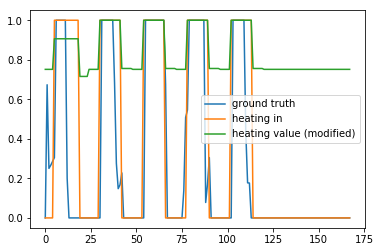

In [11]:
i_min, i_max = 7*24*3, 7*4*24

max_x = np.max(Y_train)
inside_temp_to_plot = [x/max_x for x in Y_train]

max_x = np.max(X_train[:, 2])
heating_value_to_plot = [x/max_x for x in X_train[:, 2]]

plt.plot(inside_temp_to_plot[i_min:i_max], label='ground truth')
#plt.plot(X_train[i_min:i_max, 0], label='outside temp')
plt.plot(X_train[i_min:i_max, 1], label='heating in')
plt.plot(heating_value_to_plot[i_min:i_max], label='heating value (modified## Linear regressionfrom sklearn import linear_model)')

plt.legend()
plt.show()

## Linear regression

In [12]:
from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X_train[:, 1:] , Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
y_pred = regr.predict(X_test[:, 1:])

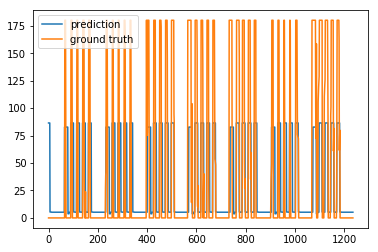

In [14]:
plt.plot(y_pred, label="prediction")
plt.plot(Y_test, label="ground truth")
plt.legend()
plt.show()

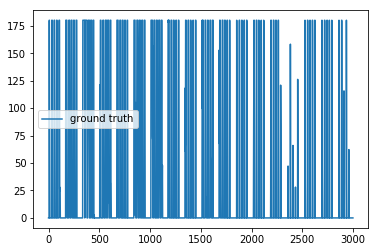

In [15]:
plt.plot(Y_train, label="ground truth")
plt.legend()
plt.show()

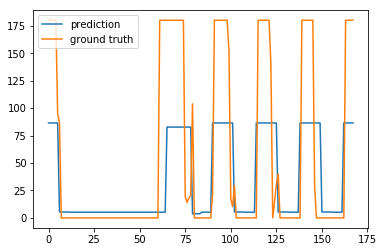

In [16]:
i_min = 7*24*3
i_max = 7*24*4

plt.plot(y_pred[i_min:i_max], label="prediction")
plt.plot(Y_test[i_min:i_max], label="ground truth")
plt.legend()
plt.show()